## Data cleaning of Census data
## Ehab Osama

First step of the project where we clear the dataset `census.csv` and stored the new version under `clean_data.csv`.

Project name: Deploying a ML Model to Cloud Application Platform with FastAPI


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/dataset/census.csv')

### Using Pandas profiling tool to visualize the data

In [3]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

- There are whitespaces in both column names and values. We will remove all leading and endng whitespaces

In [4]:
df.columns = df.columns.str.strip()

In [5]:
category_columns = [col  for col, dt in df.dtypes.items() if dt == object]
for col in category_columns:
    df[col] = df[col].str.strip()
category_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

In [6]:
numerical_columns = [col  for col, dt in df.dtypes.items() if dt != object]
numerical_columns

['age',
 'fnlgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

## Some Charts to better understand the cleaned data

<AxesSubplot:xlabel='age', ylabel='fnlgt'>

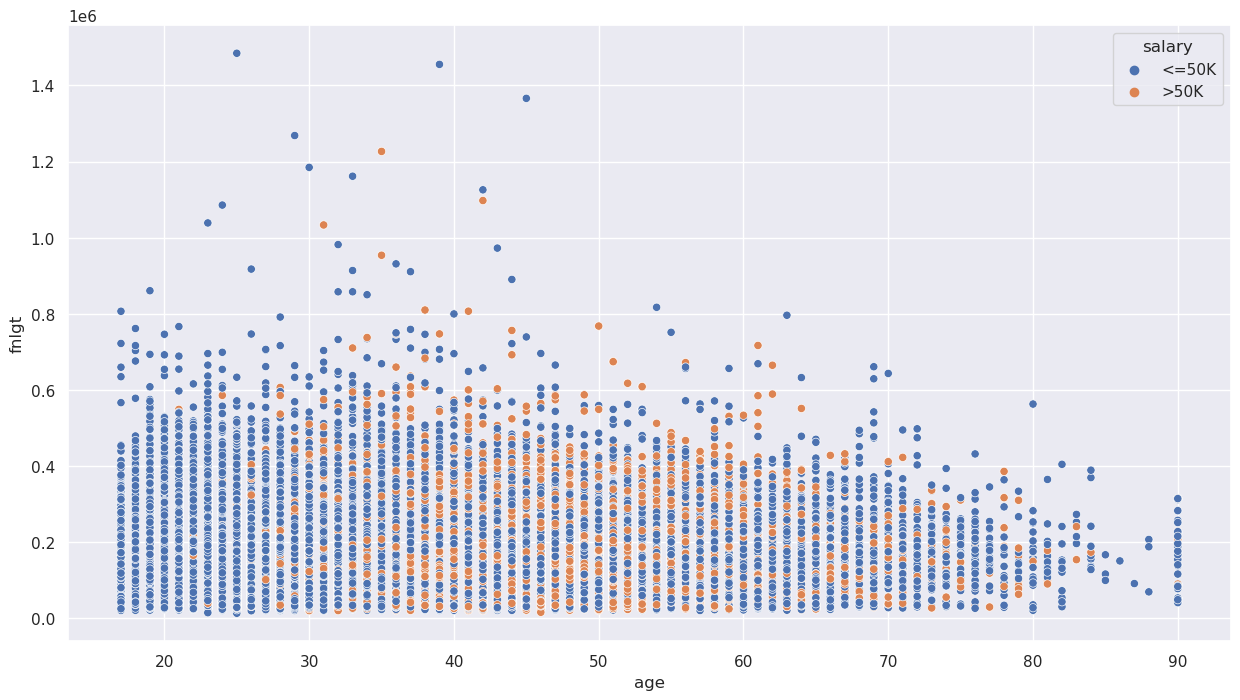

In [7]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x=df['age'], y=df['fnlgt'], hue=df['salary'])

<AxesSubplot:xlabel='age', ylabel='race'>

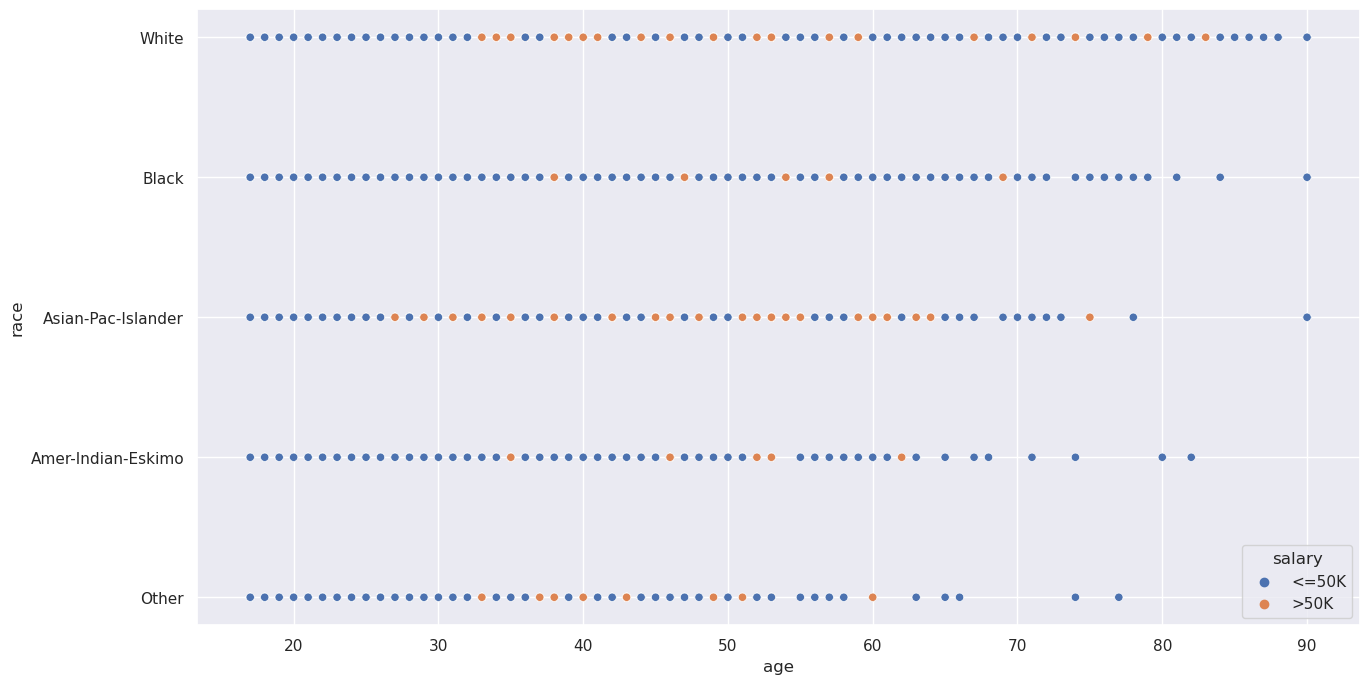

In [8]:
sns.scatterplot(x=df['age'], y=df['race'], hue=df['salary'])

<AxesSubplot:xlabel='age', ylabel='sex'>

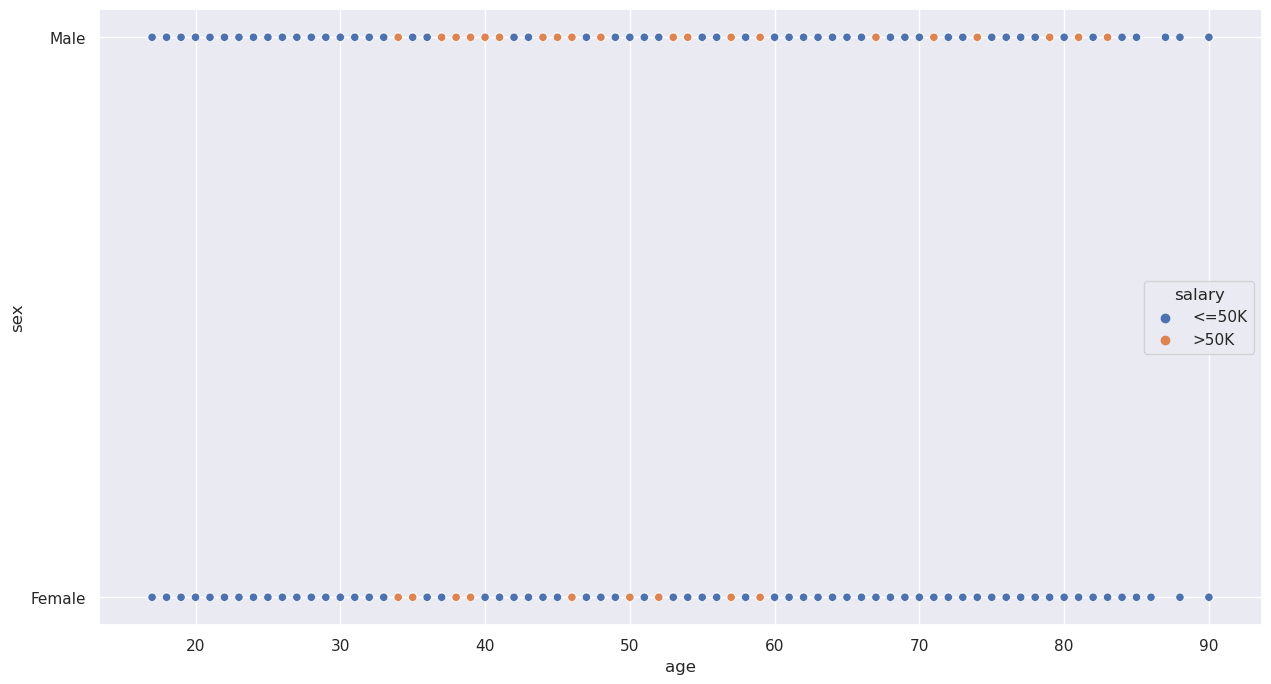

In [9]:
sns.scatterplot(x=df['age'], y=df['sex'], hue=df['salary'])

<BarContainer object of 32561 artists>

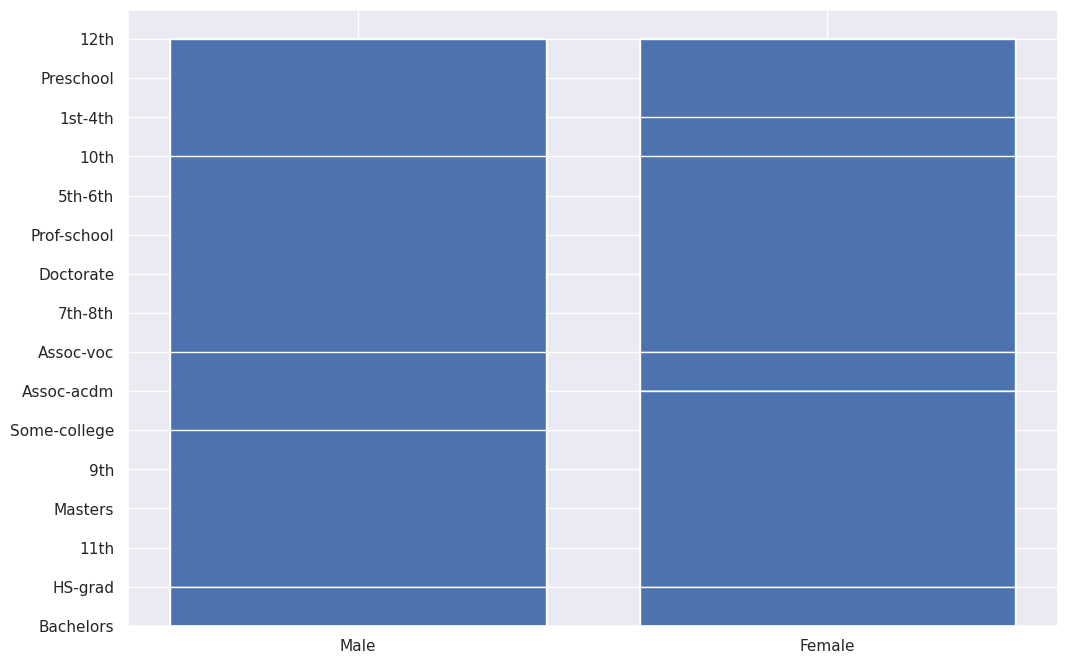

In [10]:
plt.figure(figsize = (12, 8))
plt.bar(df['sex'], df['education'])

In [13]:
df.to_csv('/kaggle/working/clean_data.csv',index=False,)